In [5]:
"""
Update Parameters Here
"""
FILE = "UninterestedUnicorns"
TOKEN_COL = "TOKEN_ID"

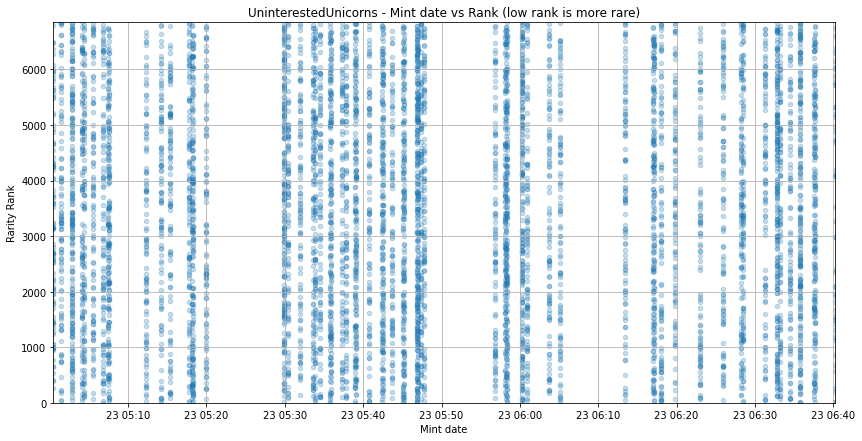

In [6]:
"""
@author: mdigi14

Adapted from 'rarity_map.ipynb'
Shows graph of Token Mint Date vs Token Rarity
"""

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from honestnft_utils import config

PATH = f"{config.MINTING_FOLDER}/{FILE}_minting.csv"
RARITY_DB = pd.read_csv(PATH)
RARITY_DB = RARITY_DB[RARITY_DB["TOKEN_ID"].duplicated() == False]
override = False


if override:
    START_DATE = "2021-08-31T15:10:00"
    END_DATE = "2021-09-01T06:10:00"
    TOP_N = 10000
else:
    TOP_N = max(RARITY_DB["TOKEN_ID"])

"""
Plot params
"""
plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

"""
Helper Functions
"""


def print_graph(RARITY_DB: pd.DataFrame) -> None:
    if TOKEN_COL == "TOKEN_NAME":
        RARITY_DB["TOKEN_ID"] = (
            RARITY_DB["TOKEN_NAME"].str.split("#").str[1].astype(int)
        )

    # make sure this is a string
    RARITY_DB["time"] = RARITY_DB["time"].astype(str)
    RARITY_DB["time"] = pd.to_datetime(RARITY_DB["time"], format="%Y-%m-%dT%H:%M:%S")

    # define x-axis limits
    if override:
        LOWER_BOUND = dt.datetime.strptime(START_DATE, "%Y-%m-%dT%H:%M:%S")
        UPPER_BOUND = dt.datetime.strptime(END_DATE, "%Y-%m-%dT%H:%M:%S")
    else:
        LOWER_BOUND = min(RARITY_DB["time"])
        UPPER_BOUND = max(RARITY_DB["time"])

    ax = RARITY_DB.plot.scatter(
        x="time",
        y="rank",
        grid=True,
        alpha=0.25,
        title="{} - Mint date vs Rank (low rank is more rare)".format(FILE),
        figsize=(14, 7),
    )

    ax.set_xlabel("Mint date")
    ax.set_ylabel("Rarity Rank")
    plt.xlim(LOWER_BOUND, UPPER_BOUND)
    plt.ylim(0, TOP_N)


print_graph(RARITY_DB)